## Imports

In [19]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import h5py

## Read in file

In [20]:
file = "snapshot_150_O1_dust_rho_xy.fits"
with fits.open(file) as hdul:
    dust_density = hdul[0].data
    header = hdul[0].header

print(header)

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 1024 / length of data axis 1                          NAXIS2  =                 1024 / length of data axis 2                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H BSCALE  =                    1 / Array value scale                              BZERO   =                    0 / Array value offset                             DATE    = '2025-06-03T16:39:28' / Date and time of creation (UTC)               ORIGIN  = 'SKIRT simulation'   / Astronomical Observatory, Ghent University     BUNIT   = 'Msun/AU3'           / Physica

## Conversions

In [21]:
# going from msun/au^3 to g/cm^3
msun_to_g = u.Msun.to('g')
au_to_cm = u.AU.to('cm')
conv_factor = msun_to_g / (au_to_cm)**3
dust_density_cgs = dust_density * conv_factor

## Density Plot

/tmp/ipykernel_82/1752916435.py:3: RuntimeWarning: divide by zero encountered in log10
  im1 = axes[0].imshow(np.log10(dust_density), cmap='viridis', origin='lower')
/tmp/ipykernel_82/1752916435.py:11: RuntimeWarning: divide by zero encountered in log10
  im2 = axes[1].imshow(np.log10(dust_density_cgs), cmap='viridis', origin='lower')


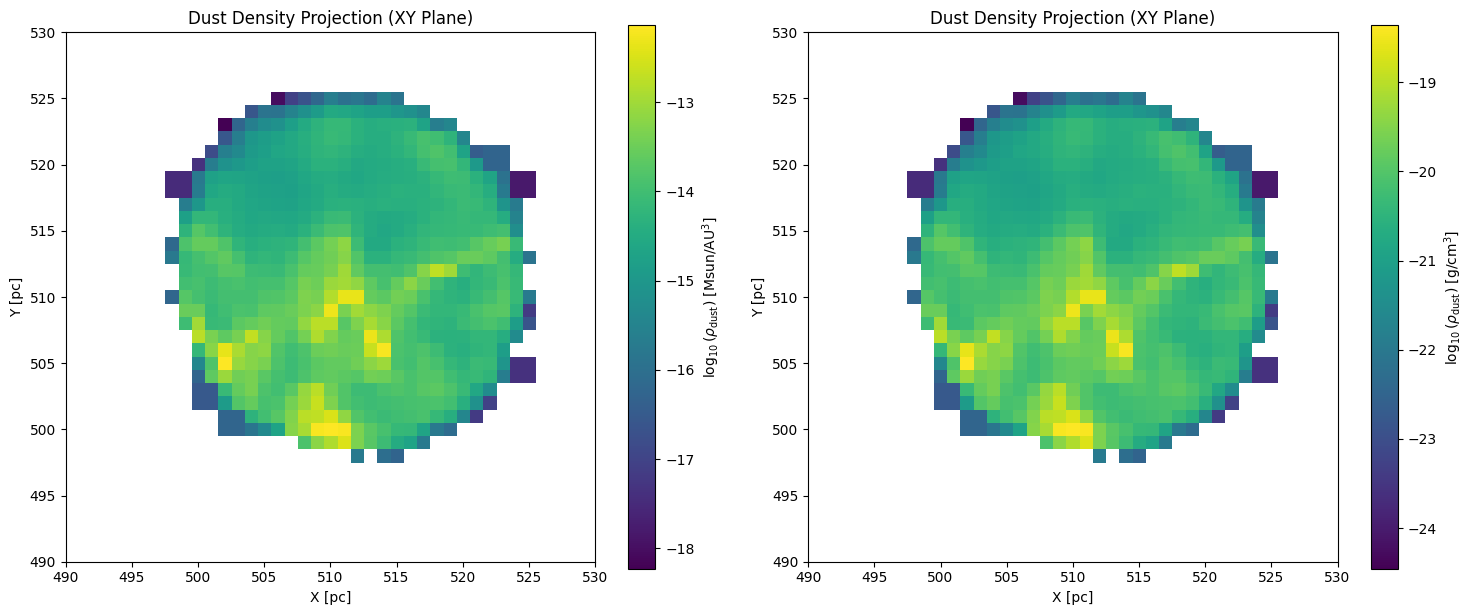

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# msun/au^3
im1 = axes[0].imshow(np.log10(dust_density), cmap='viridis', origin='lower')
cbar1 = fig.colorbar(im1, ax=axes[0], label=r'$\log_{10}(\rho_{\rm dust})$ [Msun/AU$^3$]')
axes[0].set_xlabel('X [pc]')
axes[0].set_ylabel('Y [pc]')
axes[0].set_title('Dust Density Projection (XY Plane)')
axes[0].set_xlim(490, 530)
axes[0].set_ylim(490, 530)
# g/cm^3
im2 = axes[1].imshow(np.log10(dust_density_cgs), cmap='viridis', origin='lower')
cbar2 = fig.colorbar(im2, ax=axes[1], label=r'$\log_{10}(\rho_{\rm dust})$ [g/cm$^3$]')
axes[1].set_xlabel('X [pc]')
axes[1].set_ylabel('Y [pc]')
axes[1].set_title('Dust Density Projection (XY Plane)')
axes[1].set_xlim(490, 530)
axes[1].set_ylim(490, 530)

plt.tight_layout()
plt.savefig('dust_density_xy_dual_units_log.png', dpi=300)
plt.show()

## Histogram

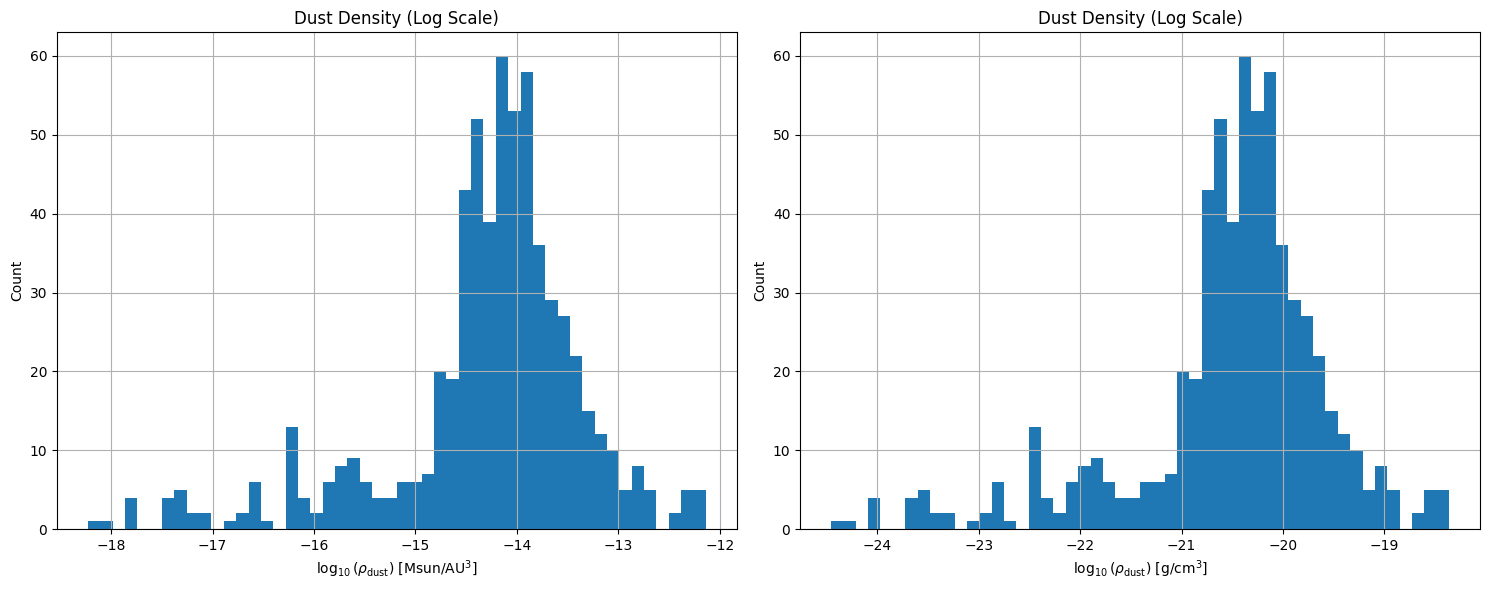

In [23]:
flat_density = dust_density.flatten()
flat_dust = flat_density[flat_density > 0]
flat_dust_cgs = flat_dust * conv_factor

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# msun/au^3
axes[0].hist(np.log10(flat_dust), bins=50)
axes[0].set_xlabel(r'$\log_{10}(\rho_{\rm dust})$ [Msun/AU$^3$]')
axes[0].set_ylabel('Count')
axes[0].set_title('Dust Density (Log Scale)')
axes[0].grid()

# g/cm^3
axes[1].hist(np.log10(flat_dust_cgs), bins=50)
axes[1].set_xlabel(r'$\log_{10}(\rho_{\rm dust})$ [g/cm$^3$]')
axes[1].set_ylabel('Count')
axes[1].set_title('Dust Density (Log Scale)')
axes[1].grid()

plt.tight_layout()
plt.savefig('dust_density_histogram_dual_units_log.png', dpi=300)
plt.show()

## Overplotting stars on dust density plots

### Loading in the snapshot file

In [24]:
# getting the star coords
snap_file = 'snapshot_150.hdf5'
with h5py.File(snap_file, 'r') as f:
    star_coords = f['PartType5']['Coordinates'][:]

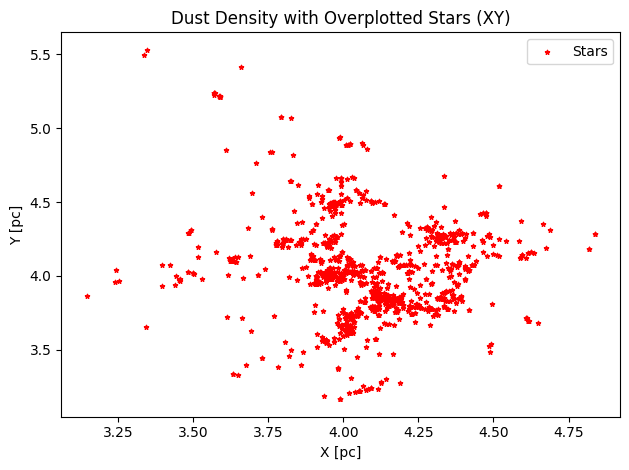

In [26]:
star_x = star_coords[:, 0]
star_y = star_coords[:, 1]
#plt.imshow(np.log10(dust_density), cmap='viridis', origin='lower')
#plt.colorbar(label=r'$\log_{10}(\rho_{\rm dust})$ [Msun/AU$^3$]')
plt.scatter(star_x, star_y, s=10, color='red', marker='*', label='Stars')
plt.xlabel('X [pc]')
plt.ylabel('Y [pc]')
plt.title('Dust Density with Overplotted Stars (XY)')
plt.legend()
plt.tight_layout()
plt.savefig('dust_density_with_stars_xy_log.png', dpi=300)
plt.show()